In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19,VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D


2024-02-27 06:19:39.513726: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 06:19:39.513843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 06:19:39.638436: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
data_path_train = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train"
data_path_val = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val"

In [ ]:
img_size = (256, 256)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_path_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)
validation_generator = val_datagen.flow_from_directory(
    data_path_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bacterial Pneumonia
1 : Corona Virus Disease
2 : Normal
3 : Tuberculosis
4 : Viral Pneumonia


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a new model on top of the VGG16 base
model = Sequential()
model.add(Conv2D(3,(3,3), input_shape=(256,256,1),activation='relu',padding='same'))
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=25,validation_data=validation_generator)

Epoch 1/25


I0000 00:00:1709014906.756128     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 [==============================] - 236s 1s/step - loss: 0.6412 - accuracy: 0.7474 - val_loss: 0.8691 - val_accuracy: 0.6706
Epoch 2/25
190/190 [==============================] - 162s 855ms/step - loss: 0.4586 - accuracy: 0.8125 - val_loss: 8.7537 - val_accuracy: 0.2148
Epoch 3/25
190/190 [==============================] - 163s 857ms/step - loss: 0.4078 - accuracy: 0.8378 - val_loss: 0.5228 - val_accuracy: 0.7862
Epoch 4/25
190/190 [==============================] - 161s 849ms/step - loss: 0.3782 - accuracy: 0.8434 - val_loss: 0.4468 - val_accuracy: 0.8061
Epoch 5/25
190/190 [==============================] - 163s 856ms/step - loss: 0.3390 - accuracy: 0.8583 - val_loss: 0.4786 - val_accuracy: 0.8011
Epoch 6/25
190/190 [==============================] - 161s 847ms/step - loss: 0.3315 - accuracy: 0.8660 - val_loss: 0.3911 - val_accuracy: 0.8279
Epoch 7/25
190/190 [==============================] - 161s 849ms/step - loss: 0.3031 - accuracy: 0.8730 - val_loss: 0.4047 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
data_path_test="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"
test_generator = test_datagen.flow_from_directory(
    data_path_test,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

# Evaluate the model on the test set
results = model.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Found 2025 images belonging to 5 classes.
64/64 [==============================] - 35s 555ms/step - loss: 0.4738 - accuracy: 0.8079
Test Loss: 0.4738316535949707
Test Accuracy: 0.8079012632369995


In [ ]:
history=model.fit(train_generator,epochs=3,validation_data=validation_generator)

Epoch 1/3
190/190 [==============================] - 160s 844ms/step - loss: 0.2397 - accuracy: 0.9047 - val_loss: 0.4658 - val_accuracy: 0.8185
Epoch 2/3
190/190 [==============================] - 160s 841ms/step - loss: 0.2374 - accuracy: 0.9032 - val_loss: 0.4629 - val_accuracy: 0.8105
Epoch 3/3
190/190 [==============================] - 161s 848ms/step - loss: 0.2381 - accuracy: 0.9034 - val_loss: 0.3885 - val_accuracy: 0.8467


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
data_path_test="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"
test_generator = test_datagen.flow_from_directory(
    data_path_test,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

# Evaluate the model on the test set
results = model.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Found 2025 images belonging to 5 classes.
64/64 [==============================] - 20s 315ms/step - loss: 0.4373 - accuracy: 0.8425
Test Loss: 0.43726879358291626
Test Accuracy: 0.8424691557884216


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred, target_names=labels.values()))

64/64 [==============================] - 19s 293ms/step
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.73      0.72      0.73       403
Corona Virus Disease       0.89      0.97      0.93       407
              Normal       0.89      0.97      0.93       404
        Tuberculosis       0.98      0.88      0.93       408
     Viral Pneumonia       0.72      0.67      0.69       403

            accuracy                           0.84      2025
           macro avg       0.84      0.84      0.84      2025
        weighted avg       0.84      0.84      0.84      2025



64/64 [==============================] - 19s 298ms/step


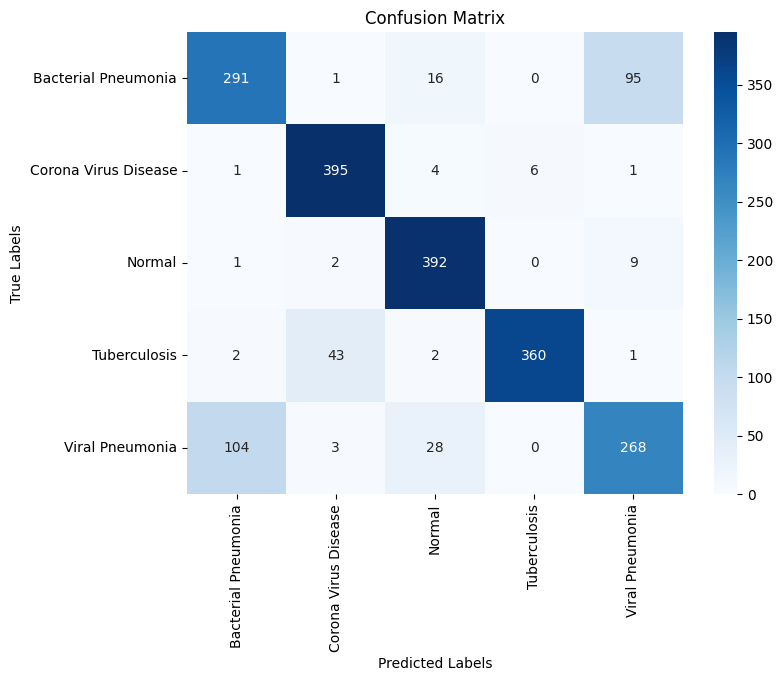

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get the true labels
true_labels = test_generator.classes

# Predict the labels using the model
predictions = model.predict(test_generator)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("multiclass_vgg16.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
